In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-gdp-growth-world-bank-1961-to-2017/India GDP from 1961 to 2017.csv


# GDP:
 Gross domestic product is a monetary measure of the market value of all the final goods and services produced 
 in a specific time period.The following Dataset has been derived from World Bank and the Data is Completely Authentic. The Dataset has 2 columns namely year and GDP values.It forecasts the gdp data from 1962 to 2017.

In [3]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 4.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Loading the Data

In [4]:
gdp=pd.read_csv("/kaggle/input/india-gdp-growth-world-bank-1961-to-2017/India GDP from 1961 to 2017.csv")
gdp.head()

,1961,3.722742533
0,1962,2.931128
1,1963,5.994353
2,1964,7.452950
3,1965,-2.635770
4,1966,-0.055329


# Renaming the columns

In [5]:
gdp.rename(columns={'1961':'year','3.722742533':'gdp'},inplace=True)


In [6]:
gdp.head()


,year,gdp
0,1962,2.931128
1,1963,5.994353
2,1964,7.452950
3,1965,-2.635770
4,1966,-0.055329


In [7]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    56 non-null     int64  
 1   gdp     56 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


# Importing the Libraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as ax

# Data Visulization

# Lineplot

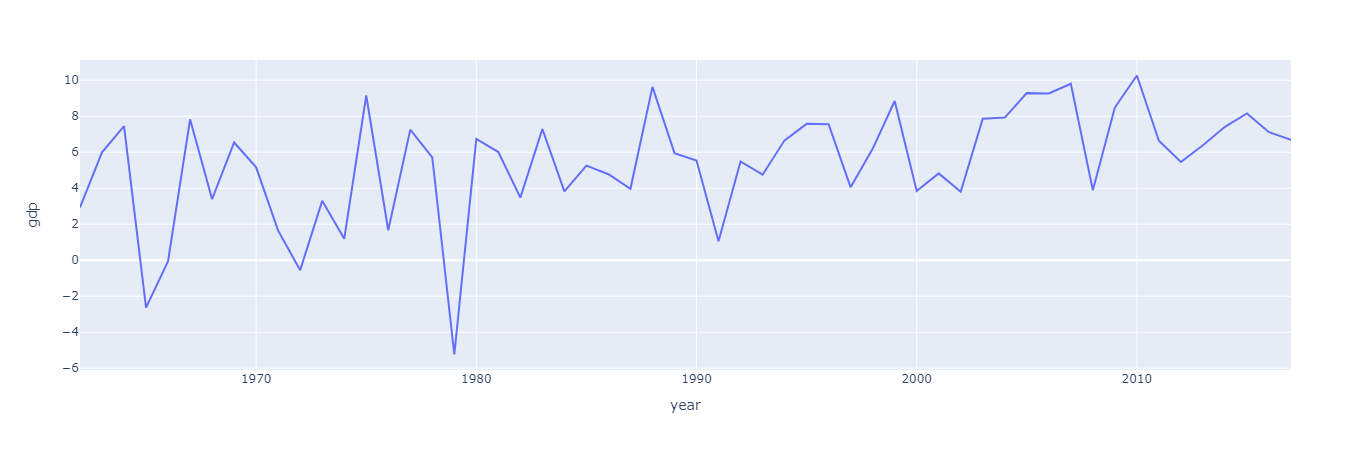

In [9]:
ax.line(gdp,x="year",y="gdp")


# Barplot

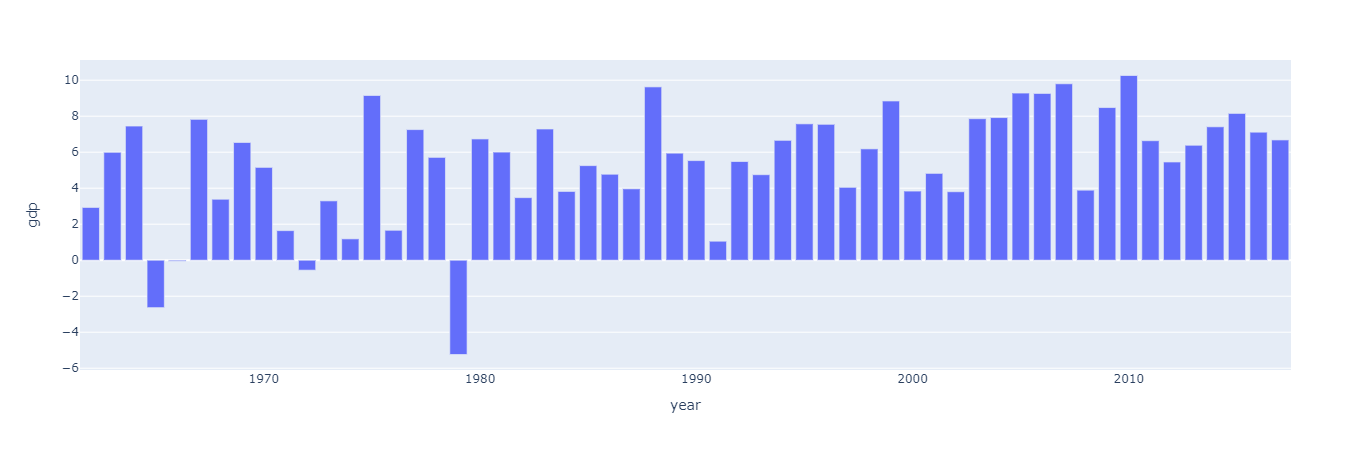

In [10]:
ax.bar(gdp,x="year",y="gdp")


# Finding the Correlation between Variables

<AxesSubplot:>

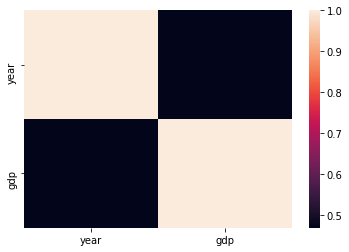

In [11]:
corr=gdp.corr()
sns.heatmap(corr)

Text(0.5, 1.0, 'Indian GDP from 1960 to 2017')

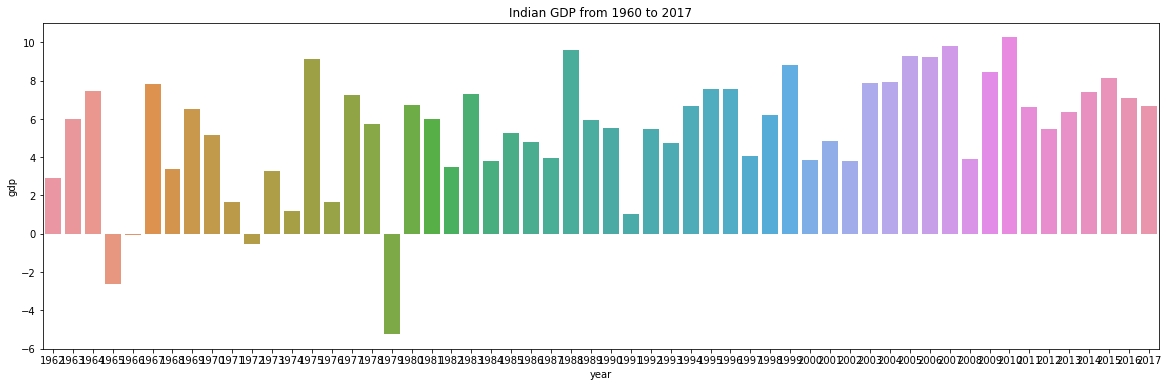

In [12]:
plt.figure(figsize=(20,6))
sns.barplot(data=gdp, x='year',y='gdp')
plt.title("Indian GDP from 1960 to 2017")

# Checking for Stationarity in the Data

In [13]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(df):
  rolling_mean = df.rolling(window = 12).mean()
  rolling_std = df.rolling(window = 12).std()

  plt.plot(df,color="red",label="Original Curve")
  plt.plot(rolling_mean,color="blue",label="Rolling mean")
  plt.plot(rolling_std,color="green",label="Rolling std")
  plt.legend(loc="best")
  plt.title("Original vs. Mean vs. Std")
  plt.show()

  dfresult = adfuller(df,autolag="AIC")
  print("Results of Dickey Fuller test: ")
  print("Test Statistic: ",dfresult[0])
  print("p-value: ",dfresult[1])
  print("#Lags used: ",dfresult[2])
  print("#Observations used: ",dfresult[3])

  for key,value in dfresult[4].items():
    print("Critical Value {}: {}".format(key,value))

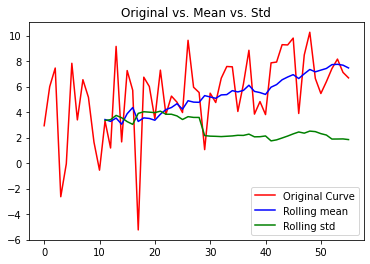

Results of Dickey Fuller test: 
Test Statistic:  -6.560954247338823
p-value:  8.384053071403029e-09
#Lags used:  0
#Observations used:  55
Critical Value 1%: -3.5552728880540942
Critical Value 5%: -2.9157312396694217
Critical Value 10%: -2.5956695041322315


In [14]:
check_stationarity(gdp['gdp'])


# Applying logarithmic to Data

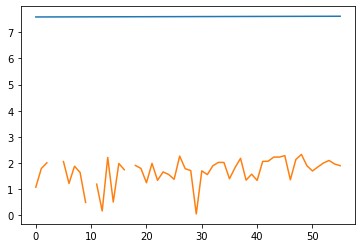

In [15]:
import numpy as np
log_df = np.log(gdp)
plt.plot(log_df)

In [16]:
log_df.fillna(method='bfill',inplace=True)

In [17]:
log_df.isnull().sum()

year    0
gdp     0
dtype: int64

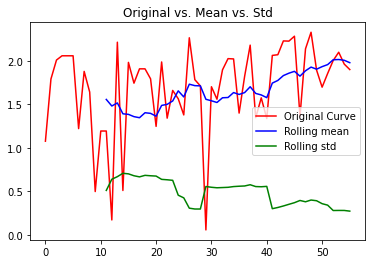

Results of Dickey Fuller test: 
Test Statistic:  -3.732018998633547
p-value:  0.003684667529637403
#Lags used:  1
#Observations used:  54
Critical Value 1%: -3.55770911573439
Critical Value 5%: -2.9167703434435808
Critical Value 10%: -2.59622219478738


In [18]:
check_stationarity(log_df['gdp'])


In [19]:
print(log_df.shape)


(56, 2)


# Splitting the Data into Train set and Test set

In [20]:
train=log_df[:46]
test=log_df[46:]
print(train.shape,test.shape)

(46, 2) (10, 2)


# Differencing the Data

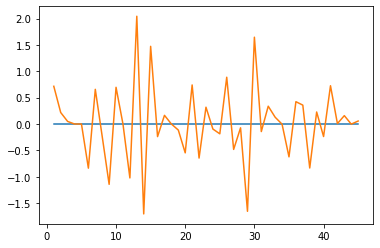

In [21]:
log_df_diff = train - train.shift()
log_df_diff.dropna(inplace=True)
plt.plot(log_df_diff)

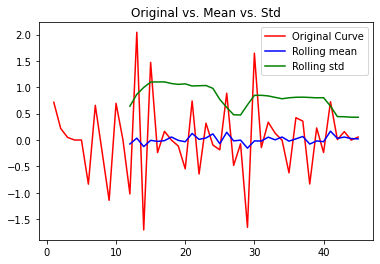

Results of Dickey Fuller test: 
Test Statistic:  -7.5543199190401
p-value:  3.128615177493259e-11
#Lags used:  1
#Observations used:  43
Critical Value 1%: -3.5925042342183704
Critical Value 5%: -2.931549768951162
Critical Value 10%: -2.60406594375338


In [22]:
check_stationarity(log_df_diff['gdp'])


In [23]:
train

,year,gdp
0,7.581720,1.075387
1,7.582229,1.790818
2,7.582738,2.008610
3,7.583248,2.057447
4,7.583756,2.057447
5,7.584265,2.057447
6,7.584773,1.220219
7,7.585281,1.877891
8,7.585789,1.640400
9,7.586296,0.496481


# Plotting acf and pacf for the Data

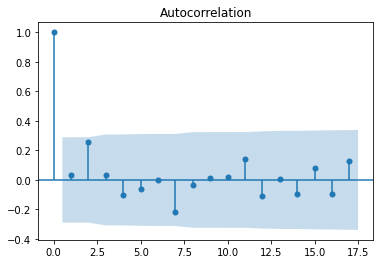

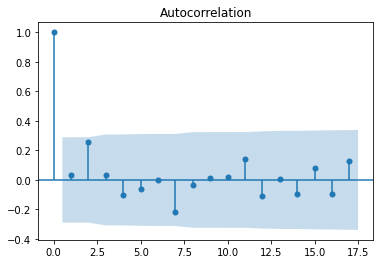

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(train['gdp'])

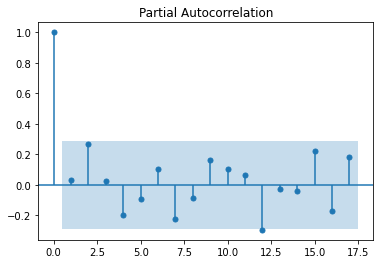

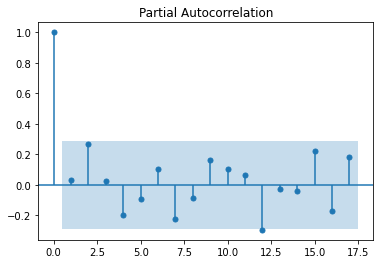

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(train['gdp'])

In [26]:
from statsmodels.tsa.arima_model import ARIMA


# Finding the best fit model using Auto Arima

In [27]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(train['gdp'], trace=True,start_p=9,max_p=16,d=1,start_q=1,max_q=8,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(9,1,1)(0,0,0)[0] intercept   : AIC=85.841, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=103.417, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=83.734, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=101.477, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=82.867, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=84.850, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=81.058, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=81.885, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=83.043, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=78.819, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=79.913, Time=0.03 sec
 ARIMA(

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

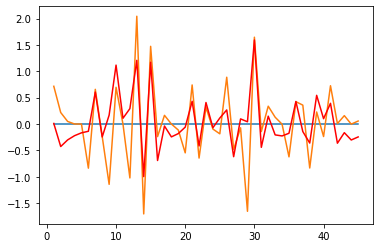

In [28]:
model_ARIMA2 = ARIMA(train['gdp'], order=(2, 1, 1))  
results_ARIMA2 = model_ARIMA2.fit(disp=-1)  
plt.plot(log_df_diff)
plt.plot(results_ARIMA2.fittedvalues, color='red')


In [29]:
results_ARIMA2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.gdp   No. Observations:                   45
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -34.565
Method:                       css-mle   S.D. of innovations              0.503
Date:                Mon, 07 Jun 2021   AIC                             79.129
Time:                        13:42:17   BIC                             88.163
Sample:                             1   HQIC                            82.497
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0103      0.008      1.376      0.169      -0.004       0.025
ar.L1.D.gdp     0.0233      0.147      0.158      0.874      -0.265       0.312
ar.L2.D.gdp     0.2639      0.148      1.786      0.074      -0.026       0.554
ma.L1.D.gdp    -0.9999      0.066    -15.128      0.000      -1.129      -0.870
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9028           +0.0000j            1.9028            0.0000
AR.2           -1.9912           +0.0000j            1.9912            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

# Forecasting the Data

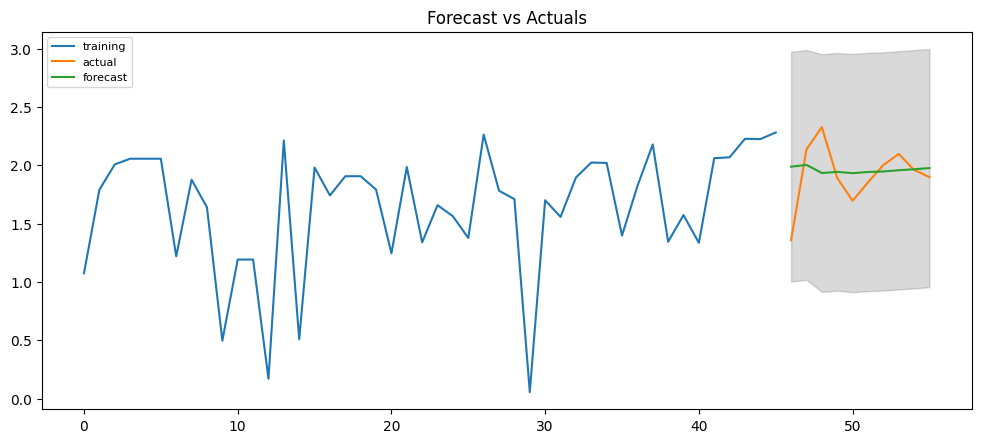

In [30]:
fc, se, conf = results_ARIMA2.forecast(len(test['gdp']), alpha=0.05)  

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['gdp'], label='training')
plt.plot(test['gdp'], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Conclusion

From the Following analysis we were able to conclude that there has been a decrease in the gdp in the year 2017 and 2020 due to impact of demonetization and corona and we can say that there will be a gradual increase in the gdp in the coming 50 years than the actual even though there is a loss in gdp due to the impact of covid19 in 2020 and 2021.